In [154]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind
!pip install opencv-python


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-ind is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [155]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import json

In [156]:
img = cv2.imread('smartcard.JPG')

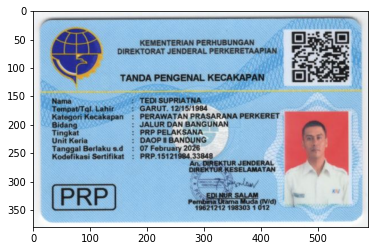

In [157]:
real_pic = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(real_pic)

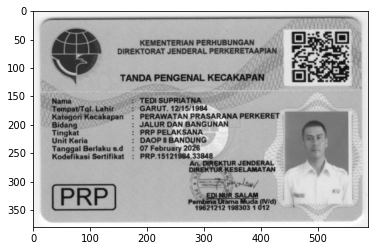

In [158]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [159]:
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)

In [160]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

 

 

   

KEMENTERIAN PERHUBUNGAN
DIREKTORAT JENDERAL PERKERETAAPIAN  

 

TANDA PENGENAL KECAKAPAN
Nama TEDI SUPRIATNA
Tempat/Tgl. Lahir GARUT. 12/15/1984
Kategori Kecakapan PERAWATAN PRASARANA PERKERET
Bidang JALUR DAN BANGUNAN
Tingkat PRP PELAKSANA
Unit Kerja DAOP II BANDUNG  

Tanggal Berlaku sd - 07 February 2026

Kodefikasi Sertifikat - PRP.15121984.33848
'An. DIREKTUR JENDERAL
DIREKTUR KESELAMATAN

 

 

 



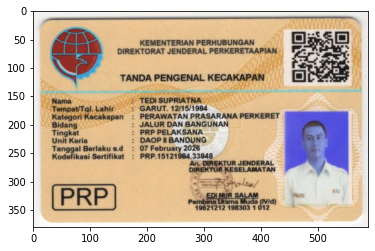

In [161]:
data = []
img = cv2.imread('smartcard.JPG')
plt.imshow(img)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")

for text2 in text2.split("\n"):
  if "”—" in text2:
    text2 = text2.replace("”—", ":")
  if "Nama 1" in text2:
    text2 = text2.replace("Nama 1", "Nama :")
  if "Tempati" in text2:
    text2 = text2.replace("Tempati", "Tempat")
  if "RT/RW" in text2:
    text2 = text2.replace("RT/RW", "RT/RW :")
    if "1" in text2:
      text2 = text2.replace("1", "0")
    if "2" in text2:
      text2 = text2.replace("2", "0")
  if "Fr" in text2:
    text2 = text2.replace("Fr"," " )
  if "a KEMENTERIAN" in text2:
    text2 = text2.replace("a KEMENTERIAN", "KEMENTERIAN")
  if "Berlakus.d" in text2:
    text2 = text2.replace("Berlakus.d", "Berlaku s.d")
  if("— ") in text2:
    text2 = text2.replace("— ", " ")
  if "Fi" in text2:
    text2 = text2.replace("Fi", " ")
  if "KECAKAPAN ma" in text2:
    text2 = text2.replace('KECAKAPAN ma', 'KECAKAPAN')
  if "»" in text2:
    text2 = text2.replace('»',' ')
  if 'Keria' in text2:
    text2 = text2.replace('Keria', 'Kerja')
  if '“ Iga' in text2:
    text2 = text2.replace('“ Iga', ' ')
  data.append(text2)
  print(text2)
  data_extract = json.dumps(text2)
  text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()
  


In [162]:
data

[' ',
 '',
 ' ',
 '',
 '   ',
 '',
 'KEMENTERIAN PERHUBUNGAN',
 'DIREKTORAT JENDERAL PERKERETAAPIAN  ',
 '',
 ' ',
 '',
 'TANDA PENGENAL KECAKAPAN',
 'Nama TEDI SUPRIATNA',
 'Tempat/Tgl. Lahir GARUT. 12/15/1984',
 'Kategori Kecakapan PERAWATAN PRASARANA PERKERET',
 'Bidang JALUR DAN BANGUNAN',
 'Tingkat PRP PELAKSANA',
 'Unit Kerja DAOP II BANDUNG  ',
 '',
 'Tanggal Berlaku sd - 07 February 2026',
 '',
 'Kodefikasi Sertifikat - PRP.15121984.33848',
 "'An. DIREKTUR JENDERAL",
 'DIREKTUR KESELAMATAN',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '\x0c']

In [163]:

df = pd.DataFrame(data,columns= [0],index = ['0','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31'])
df.to_csv('dataa.csv')

In [164]:
# Buat list tipe data kosong
missing_values = ["n/a", "na", "--", ' ','   ','\x0c']
df_ms = pd.read_csv("dataa.csv", na_values = missing_values)
df_ms = df_ms.drop(columns=['Unnamed: 0'])


In [165]:
df_ms = df_ms.dropna() 
df_ms = df_ms.reset_index(drop=True)
df_ms

,0
0,KEMENTERIAN PERHUBUNGAN
1,DIREKTORAT JENDERAL PERKERETAAPIAN
2,TANDA PENGENAL KECAKAPAN
3,Nama TEDI SUPRIATNA
4,Tempat/Tgl. Lahir GARUT. 12/15/1984
5,Kategori Kecakapan PERAWATAN PRASARANA PERKERET
6,Bidang JALUR DAN BANGUNAN
7,Tingkat PRP PELAKSANA
8,Unit Kerja DAOP II BANDUNG
9,Tanggal Berlaku sd - 07 February 2026


In [166]:
#seleksi feature berdasarkan tabel korelasi
dfff= df_ms.transpose()
dfff

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,KEMENTERIAN PERHUBUNGAN,DIREKTORAT JENDERAL PERKERETAAPIAN,TANDA PENGENAL KECAKAPAN,Nama TEDI SUPRIATNA,Tempat/Tgl. Lahir GARUT. 12/15/1984,Kategori Kecakapan PERAWATAN PRASARANA PERKERET,Bidang JALUR DAN BANGUNAN,Tingkat PRP PELAKSANA,Unit Kerja DAOP II BANDUNG,Tanggal Berlaku sd - 07 February 2026,Kodefikasi Sertifikat - PRP.15121984.33848,'An. DIREKTUR JENDERAL,DIREKTUR KESELAMATAN


In [167]:
datafix = []
datafix = pd.DataFrame(columns=['Penerbit'])

In [168]:
datafix1 = []
datafix1 = pd.DataFrame(columns=['Tipe'])

In [169]:
datafix2 = []
datafix2 = pd.DataFrame(columns=['Nama'])
datafix3 = []
datafix3 = pd.DataFrame(columns=['Tempat/Tgl.Lahir'])
datafix4 = []
datafix4 = pd.DataFrame(columns=['Kategori'])
datafix5 = []
datafix5 = pd.DataFrame(columns=['Unit Kerja'])
datafix6 = []
datafix6 = pd.DataFrame(columns=['Tanggal Berlaku'])
datafix7 = []
datafix7 = pd.DataFrame(columns=['Kodefikasi'])
datafix8 = []
datafix8 = pd.DataFrame(columns=['Atas Nama'])

In [170]:
dtstr0 = dfff[0]+' '+ dfff[1]
dtstr1 = dfff[2]
dtstr2 = dfff[3]
dtstr3 = dfff[4]
dtstr4 = dfff[5]+ ' '+ dfff[6]+ ' '+dfff[7]
dtstr5 = dfff[8]
dtstr6 = dfff[9]
dtstr7 = dfff[10]
dtstr8 = dfff[11]+ ' '+ dfff[12]


In [171]:
datafix['Penerbit'] = datafix['Penerbit'].append(dtstr0)
datafix

,Penerbit
0,KEMENTERIAN PERHUBUNGAN DIREKTORAT JENDERAL PE...


In [172]:
datafix1['Tipe'] = datafix1['Tipe'].append(dtstr1)

In [173]:
datafix2['Nama']= datafix2['Nama'].append(dtstr2)
datafix3['Tempat/Tgl.Lahir'] = datafix3['Tempat/Tgl.Lahir'].append(dtstr3)
datafix4['Kategori'] = datafix4['Kategori'].append(dtstr4)
datafix5['Unit Kerja'] = datafix5['Unit Kerja'].append(dtstr5)
datafix6['Tanggal Berlaku'] = datafix6['Tanggal Berlaku'].append(dtstr6)
datafix7['Kodefikasi'] = datafix7['Kodefikasi'].append(dtstr7)
datafix8['Atas Nama'] = datafix8['Atas Nama'].append(dtstr8)


In [174]:
FINALL = pd.concat([datafix,datafix1, datafix2, datafix3,datafix4,datafix5,datafix6,datafix7,datafix8], axis=1)
FINALL.to_excel('datasertifikasi.xlsx')

In [175]:
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', text.shape[0]+1)

In [176]:
print("text1 : \n")
print(text1,"\n\n")

print("text : \n")
print(text, "\n\n")
  
print("lines : \n")
for i in range(len(lines)):
  print("level", i, ": ", lines.iloc[i])

print("\n\n conf : \n")
print(conf)

text1 : 

    level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
0       1         1          0        0         0         0     0    0    589   
1       2         1          1        0         0         0    33   12    350   
2       3         1          1        1         0         0    33   12    350   
3       4         1          1        1         1         0    33   12    350   
4       5         1          1        1         1         1    33   12    350   
..    ...       ...        ...      ...       ...       ...   ...  ...    ...   
94      5         1          9        1         1         2   399  331     28   
95      2         1         10        0         0         0   377  301     12   
96      3         1         10        1         0         0   377  301     12   
97      4         1         10        1         1         0   377  301     12   
98      5         1         10        1         1         1   377  301     12   

    height  conf 

In [177]:
from pytesseract import Output

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [178]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

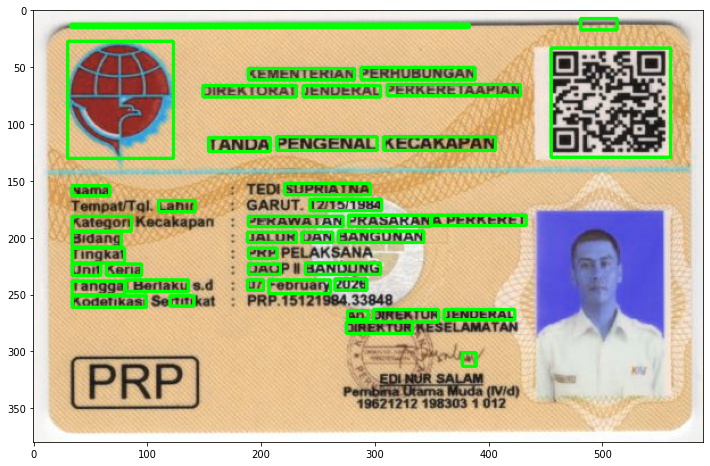

In [179]:
display(img)